In [1]:
%load_ext autoreload
%autoreload 2

## (Strategy Proofness - First Order Stochastic Dominance)
$$
\forall i\in W\cup F \ \forall \succ_i \forall \succ_{-i} \forall \succ'_i \forall j \\
\sum_{j'\succeq j}(g_{ij'}(\succ'_i,\succ_{-i})-g_{ij'}(\succ_i,\succ_{-i})) \leq 0
$$

## (Ex-ante Stability)
$\nexists (w,f)\in W\times F$ s.t. $\exist f'\ [g_{wf'}(\succ)>0\land f\succ_w f']\ \exist w'\ [g_{w'f}(\succ)>0\land w\succ_f w']$

## (Stability of Deterministic Matching)
$$
\forall (w,f)\in W\times F \ g_{wf}+\sum_{f'\succ_w f}g_{wf'}+\sum_{w'\succ_f w}g_{w'f}\geq 1
$$

## (Ex-post Stability)
A randomized matching is **ex-post stable** iff it can be decomposed into deterministic stable matchings.

## (Fractionally Stable)
$$
\forall (w,f)\in W\times F \ g_{wf}+\sum_{f'\succ_w f}g_{wf'}+\sum_{w'\succ_f w}g_{w'f}\geq 1
$$

### (Violation of Fractionally Stability)
$$
\sum_\succ\sum_w\sum_f\max\left\{0,1-g_{wf}(\succ)-\sum_{w'\succ_f w}g_{w'f}(\succ)-\sum_{f'\succ_w f}g_{wf'}(\succ)\right\}
$$

## (Primal)
$$
\begin{align*}
    \min & \sum_\succ\sum_w\sum_f t_{wf}(\succ)\\
    \text{s.t.} & \sum_f g_{wf}(\succ)\leq 1 & \forall\succ\forall w \\
    & \sum_w g_{wf}(\succ)\leq 1 & \forall \succ\forall f\\
    & t_{wf}(\succ)\geq 1-g_{wf}(\succ)-\sum_{w'\succ_f w}g_{w'f}(\succ)-\sum_{f'\succ_w f}g_{wf'}(\succ) & \forall\succ\forall w\forall f\\
    & \sum_{f'\succ_wf}(g_{wf'}(\succ_w',\succ_{-w})-g_{wf'}(\succ))\leq 0 & \forall\succ\forall w\forall\succ_{w}'\forall f\\
    & \sum_{w'\succ_fw}(g_{w'f}(\succ_f',\succ_{-f})-g_{w'f}(\succ))\leq 0 & \forall\succ\forall f\forall\succ_{f}'\forall w\\
    & g_{wf}(\succ)\geq 0,\ t_{wf}(\succ)\geq 0 & \forall\succ\forall w \forall y
\end{align*}
$$



efficient_loss:

$M = 効率的なマッチングの集合$ とした時、そのマッチング$\mu$におけるefficiency_lossは
$$
\min_{\nu \in M} \sum_{p \in P} \sum_{q \in Q}  (\sum{}\nu())

$$

## (Dual)
$$
\begin{align*}
    \min & \sum_\succ\left(\sum_wx_w(\succ)+\sum_fy_f(\succ)-\sum_w\sum_fz_{wf}(\succ)\right)\\
    \text{s.t.}  \\
    & \forall \succ \forall w \forall f\\
    & x_w(\succ)+y_f(\succ)-z_{wf}(\succ)-\sum_{f'\prec_wf}z_{wf'}(\succ)-\sum_{w'\prec_fw}z_{w'f}(\succ)-\sum_{\succ_w'}\left(\sum_{f'\prec_w f}u_{wf'}(\succ_w',\succ_w,\succ_{-w})-\sum_{f'\prec_w'f}u_{wf'}(\succ_w,\succ_w',\succ_{-w})\right)-\sum_{\succ_f'}\left(\sum_{w'\prec_fw}v_{w'f}(\succ_f',\succ_f,\succ_{-f})-\sum_{w'\prec_f'w}v_{w'f}(\succ_f,\succ_f',\succ_{-f})\right)\geq 0 & \forall\succ\forall w\forall f\\
    & x_w(\succ)\geq 0,\ y_f(\succ)\geq 0,\ 0\leq z_{wf}(\succ)\leq 1 & \forall\succ\forall w\forall f\\
    & u_{wf}(\succ'_w,\succ_w,\succ_{-w})\geq 0 & \forall\succ\forall w\forall\succ_w'\forall f\\
    & v_{wf}(\succ'_f,\succ_f,\succ_{-f})\geq 0 & \forall\succ\forall f\forall\succ_f'\forall w
\end{align*}
$$

In [16]:
import os
import sys
import time
import logging
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
from random import random
import itertools
from pathlib import Path

sys.path.append(str(Path("primal_dual_matching.ipynb").resolve().parent.parent))

import torch
import torch.nn
from torch import optim
import torch.nn.functional as F

from data import Data

from primal_net import PrimalNet
from primal_loss import *
from primal_train import *

#from dual_net import DualNet
#from dual_loss import *
#from dual_train import *

import torch
import matplotlib.pyplot as plt
import seaborn as sns

### 2*2

In [132]:
device = "mps" #if torch.cuda.is_available() else "cpu"
lambd = np.ones((2,2))*0.001
# lambd = cfg.lambd

cfg = HParams(num_agents = 2,
              device = device,
              lambd = lambd,
              rho = 0.1,
              lagr_iter = 10,
              batch_size = 32,
              epochs=10000)

cfg.lr = 1e-4

np.random.seed(cfg.seed)

G = Data(cfg)

model = PrimalNet(cfg)
model.to(device)

train_primal(cfg,G,model)

2024-12-16 18:10:48,755:INFO:[TRAIN-ITER]: 0, [Time-Elapsed]: 0.156508, [Total-Loss]: 0.190648
2024-12-16 18:10:48,758:INFO:[CONSTR-Vio]: 0.000397, [OBJECTIVE]: 0.158863, [EFFICIENCY-loss]:  0.031785


t mean: 0.03971577063202858
t max: 0.5086209774017334
t min: 0.0
t mean: 0.059413403272628784
t max: 0.5074684619903564
t min: 0.0
t mean: 0.07906465232372284
t max: 0.5063648819923401
t min: 0.0
t mean: 0.06706331670284271
t max: 0.5052825212478638
t min: 0.0
t mean: 0.0629839301109314
t max: 0.5042276978492737
t min: 0.0
t mean: 0.07072551548480988
t max: 0.5031864643096924
t min: 0.0
t mean: 0.08233144879341125
t max: 0.5021237730979919
t min: 0.0
t mean: 0.07040353864431381
t max: 0.5010590553283691
t min: 0.0
t mean: 0.054647646844387054
t max: 0.49998587369918823
t min: 0.0
t mean: 0.0779205858707428
t max: 0.49889516830444336
t min: 0.0
t mean: 0.05443213880062103
t max: 0.4977753758430481
t min: 0.0
t mean: 0.065946564078331
t max: 0.4966467618942261
t min: 0.0
t mean: 0.05806644260883331
t max: 0.49558985233306885
t min: 0.0
t mean: 0.06567197293043137
t max: 0.4945549964904785
t min: 0.0
t mean: 0.061685770750045776
t max: 0.4935457706451416
t min: 0.0
t mean: 0.0577045977115

2024-12-16 18:10:56,638:INFO:[TRAIN-ITER]: 100, [Time-Elapsed]: 8.042199, [Total-Loss]: 0.063234
2024-12-16 18:10:56,639:INFO:[CONSTR-Vio]: 0.000179, [OBJECTIVE]: 0.000869, [EFFICIENCY-loss]:  0.062365


t mean: 0.0002680872566998005
t max: 0.002471327781677246
t min: 0.0
t mean: 0.0002172667591366917
t max: 0.002338230609893799
t min: 0.0
t mean: 0.0002950053894892335
t max: 0.0022174715995788574
t min: 0.0
t mean: 0.0002439409727230668
t max: 0.0021099448204040527
t min: 0.0
t mean: 0.00015733008331153542
t max: 0.0020148754119873047
t min: 0.0
t mean: 0.0002153737295884639
t max: 0.0019322037696838379
t min: 0.0
t mean: 0.00015901087317615747
t max: 0.001858055591583252
t min: 0.0
t mean: 0.00022859693854115903
t max: 0.0017929673194885254
t min: 0.0
t mean: 0.00013565225526690483
t max: 0.0017338395118713379
t min: 0.0
t mean: 0.0001314126857323572
t max: 0.0016760826110839844
t min: 0.0
t mean: 0.00014890951570123434
t max: 0.0016353130340576172
t min: 0.0
t mean: 0.0001905540411826223
t max: 0.001588582992553711
t min: 0.0
t mean: 0.0002245039213448763
t max: 0.001553177833557129
t min: 0.0
t mean: 0.00016272012726403773
t max: 0.001512765884399414
t min: 0.0
t mean: 0.0001376527

KeyboardInterrupt: 

In [ ]:
p = torch.tensor([[1, 0.0], [0, 1]]).to(device)
q = torch.tensor([[1, 0.0], [0, 1]]).to(device)

output = model(p, q)

In [ ]:
output

tensor([[[0.5070, 0.4930],
         [0.4929, 0.5071]]], device='mps:0', grad_fn=<DivBackward0>)

### 3* 3

In [7]:
device = "mps" #if torch.cuda.is_available() else "cpu"
lambd = np.ones((3,3))*0.001
# lambd = cfg.lambd

cfg = HParams(num_agents = 3,
              device = device,
              lambd = lambd,
              rho = 0.1,
              lagr_iter = 100,
              batch_size = 128,
              epochs = 10000)

cfg.lr = 1e-4

np.random.seed(cfg.seed)

G = Data(cfg)

In [6]:
model = PrimalNet(cfg)
model.to(device)

PrimalNet(
  (input_block): Sequential(
    (0): Linear(in_features=18, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (layer_out): Linear(in_features=256, out_features=9, bias=True)
)

In [7]:
train_primal(cfg,G,model)

2024-12-21 17:46:09,713:INFO:[TRAIN-ITER]: 0, [Time-Elapsed]: 1.896664, [Total-Loss]: 1.567277
2024-12-21 17:46:09,715:INFO:[CONSTR-Vio]: 0.001671, [OBJECTIVE]: 1.561960, [EFFICIENCY-loss]:  0.005315
2024-12-21 17:48:14,275:INFO:[TRAIN-ITER]: 100, [Time-Elapsed]: 126.458519, [Total-Loss]: 1.379439
2024-12-21 17:48:14,278:INFO:[CONSTR-Vio]: 0.072068, [OBJECTIVE]: 1.377446, [EFFICIENCY-loss]:  0.001889
2024-12-21 17:50:25,142:INFO:[TRAIN-ITER]: 200, [Time-Elapsed]: 257.325461, [Total-Loss]: 0.788619
2024-12-21 17:50:25,144:INFO:[CONSTR-Vio]: 0.391810, [OBJECTIVE]: 0.775084, [EFFICIENCY-loss]:  0.011954
2024-12-21 17:52:43,101:INFO:[TRAIN-ITER]: 300, [Time-Elapsed]: 395.284120, [Total-Loss]: 0.648144
2024-12-21 17:52:43,102:INFO:[CONSTR-Vio]: 0.393012, [OBJECTIVE]: 0.659801, [EFFICIENCY-loss]:  -0.014967
2024-12-21 17:54:49,689:INFO:[TRAIN-ITER]: 400, [Time-Elapsed]: 521.872136, [Total-Loss]: 0.720561
2024-12-21 17:54:49,691:INFO:[CONSTR-Vio]: 0.443050, [OBJECTIVE]: 0.714589, [EFFICIENCY-

In [8]:
torch.save(model.state_dict(), 'model')

In [15]:
torch.save(model.state_dict(), 'model_state_dict.pth')

In [8]:
# 空のモデルインスタンスを作成
model_s = PrimalNet(cfg)  # モデルクラスを再定義する必要があります
model_s.load_state_dict(torch.load('model_state_dict.pth'))
model_s.to(device)
model_s.eval()


/var/folders/y_/0ll3m2hj5r9cswvxrg0b576r0000gn/T/ipykernel_39289/452310846.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_s.load_state_dict(torch.load('model_stat

PrimalNet(
  (input_block): Sequential(
    (0): Linear(in_features=18, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (layer_out): Linear(in_features=256, out_features=9, bias=True)
)

In [9]:
model = model_s

### plot

In [17]:
def plot_matching(p, q, match):
    # Move tensor to CPU and convert to NumPy
    output_matrix = match.squeeze().detach().cpu().numpy()

    annotations = np.empty_like(output_matrix, dtype=object)
    for i in range(output_matrix.shape[0]):
        for j in range(output_matrix.shape[1]):
            annotations[i, j] = f'{output_matrix[i, j]:.2e}\n[{p[i, j]}, {q[j, i]}]'

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(output_matrix, annot=annotations, fmt='', cmap='Blues', cbar=True)
    plt.title("Agent Relationship Heatmap with Vector Details")
    plt.xlabel("Agent")
    plt.ylabel("Agent")
    plt.show()


In [10]:
p = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)
q = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)

output = model(p, q)

In [11]:
output

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], device='mps:0', grad_fn=<DivBackward0>)

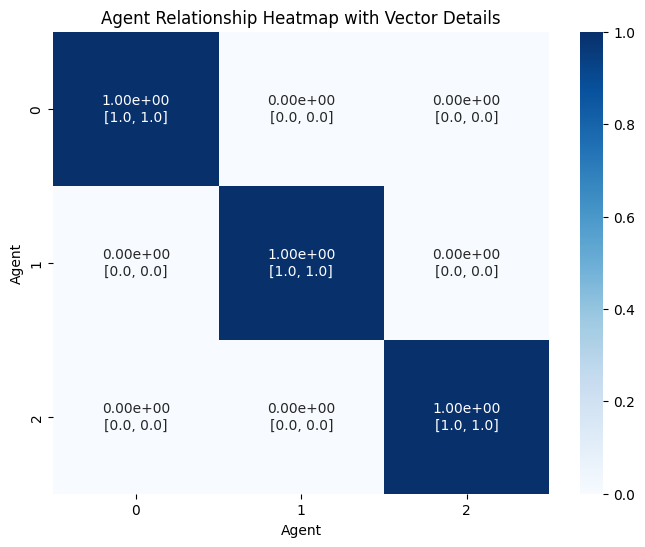

In [18]:
plot_matching(p, q, output)

### compare

In [19]:
from primal_loss import compute_t

In [20]:
from efficiency_loss import compute_efficiency_loss

In [21]:
from utils import da_with_t

In [27]:
p = torch.tensor([[[0.6, 0.3, 1], [1, 0.5, 0], [0.3, 0, 1]]]).to(device)
q = torch.tensor([[[0.5, 1.0, 0], [0, 1, 0.5], [0, 0.5, 1.0]]]).to(device)

In [146]:
p = torch.tensor([p]).to(device)
q = torch.tensor([q]).to(device)

In [147]:
p

tensor([[[0.1667, 0.5000, 0.3333],
         [0.3333, 0.5000, 0.1667],
         [0.1667, 0.5000, 0.3333]]], device='mps:0')

In [148]:
q

tensor([[[0.4000, 0.2000, 0.4000],
         [0.2000, 0.4000, 0.4000],
         [0.2000, 0.4000, 0.4000]]], device='mps:0')

In [152]:
compute_efficiency_loss(cfg, da_output, p, q)

batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')


tensor(-0.5000, device='mps:0')

In [151]:
da_output

tensor([[[0.5000, 0.0000, 0.5000],
         [0.5000, 0.5000, 0.0000],
         [0.0000, 0.5000, 0.5000]]], device='mps:0')

In [150]:
model_output = model(p, q)
model_efficiency_loss = compute_efficiency_loss(cfg, model_output, p, q)
model_stability_loss = compute_t(model_output, p, q).mean()
model_sp_loss = compute_spv_w(cfg, model, model_output, p, q).mean()

da_output = da_with_t(p, q)
da_efficiency_loss = compute_efficiency_loss(cfg, da_output, p, q)
da_stability_loss = compute_t(da_output, p, q).mean()
da_sp_loss = compute_spv_w(cfg, da_with_t, da_output, p, q).mean()

batch_size 1
(0, 1, 2) tensor(-0.8149, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.1851, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')


In [113]:
print(f"p:{p}")
print(f"q:{q}")
print("\nModel Results:")
print(f"  Output: {model_output}")
print(f"  Efficiency Loss: {model_efficiency_loss}")
print(f"  Stability Loss: {model_stability_loss}")
print(f"  SP Loss: {model_sp_loss}")

print("\nDA Results:")
print(f"  Output: {da_output}")
print(f"  Efficiency Loss: {da_efficiency_loss}")
print(f"  Stability Loss: {da_stability_loss}")
print(f"  SP Loss: {da_sp_loss}")

p:tensor([[[0.5000, 0.1667, 0.3333],
         [0.3333, 0.5000, 0.1667],
         [0.3333, 0.5000, 0.1667]]], device='mps:0')
q:tensor([[[0.4000, 0.2000, 0.4000],
         [0.4000, 0.2000, 0.4000],
         [0.4000, 0.4000, 0.2000]]], device='mps:0')

Model Results:
  Output: tensor([[[9.3796e-01, 1.4272e-05, 6.2023e-02],
         [6.7026e-02, 1.3577e-03, 9.3162e-01],
         [4.1644e-04, 9.9931e-01, 2.7459e-04]]], device='mps:0',
       grad_fn=<DivBackward0>)
  Efficiency Loss: -0.006724852602928877
  Stability Loss: 0.19931083917617798
  SP Loss: 0.05522659793496132

DA Results:
  Output: tensor([[[1., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]], device='mps:0')
  Efficiency Loss: 0.0
  Stability Loss: 0.20000000298023224
  SP Loss: 0.0


## patterns_2_1
受け手の選好は必ず二つの同等に好ましい提案者と、好ましくない一人の提案者となる

提案側の選考はランダムな強選好

In [40]:
from utils import normalize_tuples, apply_features, convert_to_float

In [32]:
one_tie_2_1 = list(set(itertools.permutations([2, 2, 1])))

In [33]:
no_tie_patterns = list(itertools.permutations([3, 2, 1]))

In [114]:
import random
random.seed(314)

one_tie_2_1 = normalize_tuples(one_tie_2_1)
no_tie_patterns = normalize_tuples(no_tie_patterns)
preference_list_p = list(itertools.product(no_tie_patterns, repeat=3))
preference_list_q = list(itertools.product(one_tie_2_1, repeat=3))
pairs = [(random.choice(preference_list_p), random.choice(preference_list_q)) for _ in range(1000)]
df_1 = pd.DataFrame(pairs, columns=['p', 'q'])

In [115]:
df_1

,p,q
0,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ..."
1,"((0.5000000000000001, 0.33333333333333337, 0.1...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ..."
2,"((0.5000000000000001, 0.33333333333333337, 0.1...","((0.4, 0.4, 0.2), (0.2, 0.4, 0.4), (0.4, 0.4, ..."
3,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.2, 0.4, 0.4), (0.2, 0.4, ..."
4,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.2, 0.4, ..."
...,...,...
995,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.2, 0.4, 0.4), (0.2, 0.4, 0.4), (0.2, 0.4, ..."
996,"((0.33333333333333337, 0.5000000000000001, 0.1...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.4, 0.2, ..."
997,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.2, 0.4, ..."
998,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ..."


In [137]:
df_1 = apply_features(cfg, model, df_1)

Processing rows:   0%|          | 2/1000 [00:00<01:26, 11.57it/s]

batch_size 1
(0, 2, 1) tensor(-0.0067, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0077, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.1058, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   0%|          | 4/1000 [00:00<01:41,  9.85it/s]

(0, 2, 1) tensor(-0.1058, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.1058, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.8149, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.1851, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1


Processing rows:   1%|          | 6/1000 [00:00<01:29, 11.16it/s]

(0, 1, 2) tensor(-0.9978, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0146, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.9965, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9965, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0035, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) 

Processing rows:   1%|          | 8/1000 [00:00<01:38, 10.11it/s]

tensor(-1.2500, device='mps:0')
(1, 2, 0) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0166, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0166, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9834, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')
(2, 0, 1) tensor(-0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0054, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   1%|          | 10/1000 [00:00<01:33, 10.61it/s]

(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.6298, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.3702, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9536, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.9536, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0464, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(1, 0, 2) tensor(-1.2500, device='mps:0')


Processing rows:   1%|          | 12/1000 [00:01<01:37, 10.14it/s]

(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0037, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0037, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9613, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9613, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9613, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')


Processing rows:   1%|▏         | 14/1000 [00:01<01:40,  9.79it/s]

(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.3882, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.3882, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.3882, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0194, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0194, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:   2%|▏         | 18/1000 [00:01<01:20, 12.20it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0288, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0052, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.4239, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0123, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-2.0123, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0123, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0036, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0036, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0036, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1,

Processing rows:   2%|▏         | 22/1000 [00:02<01:23, 11.68it/s]

batch_size 1
(0, 1, 2) tensor(0.0395, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9605, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(1.3675, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0071, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0071, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   2%|▏         | 24/1000 [00:02<01:19, 12.24it/s]

(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(1.8848, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(2.8586, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0380, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0380, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0380, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   3%|▎         | 28/1000 [00:02<01:16, 12.68it/s]

(0, 1, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0045, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.9967, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9246, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   3%|▎         | 30/1000 [00:02<01:13, 13.15it/s]

(1, 0, 2) tensor(0.0754, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.3054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0315, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   3%|▎         | 34/1000 [00:02<01:08, 14.20it/s]

(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0299, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0299, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0138, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:   4%|▎         | 36/1000 [00:02<01:06, 14.46it/s]

batch_size 1
(1, 2, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.3961, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.6039, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.3961, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:   4%|▍         | 40/1000 [00:03<01:05, 14.67it/s]

(1, 2, 0) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0163, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.9130, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:   4%|▍         | 42/1000 [00:03<01:03, 15.10it/s]

batch_size 1
(1, 0, 2) tensor(-0.0396, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9536, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.9536, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0464, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(1, 0, 2) tensor(-1.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0043, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   5%|▍         | 46/1000 [00:03<01:08, 14.02it/s]

(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0028, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0028, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.4462, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   5%|▍         | 48/1000 [00:03<01:05, 14.64it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.1319, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.8681, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9998, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9998, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   5%|▌         | 50/1000 [00:04<01:13, 12.94it/s]

batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0090, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9910, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.1175, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1175, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   5%|▌         | 54/1000 [00:04<01:17, 12.25it/s]

(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.3210, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.6790, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.3210, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.2500, device='mps:0')
(1, 2, 0) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-1.2500, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:   6%|▌         | 56/1000 [00:04<01:17, 12.22it/s]

batch_size 1
(0, 1, 2) tensor(0.0052, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0042, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0042, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0042, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0041, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9959, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   6%|▌         | 58/1000 [00:04<01:23, 11.31it/s]

(2, 0, 1) tensor(-0.9959, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(1.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0004, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0004, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   6%|▌         | 60/1000 [00:04<01:26, 10.91it/s]

batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.1088, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.8912, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.8912, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   6%|▌         | 62/1000 [00:05<01:16, 12.22it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0090, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0076, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9924, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) 

Processing rows:   7%|▋         | 66/1000 [00:05<01:14, 12.60it/s]

tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0089, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0359, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   7%|▋         | 68/1000 [00:05<01:11, 13.01it/s]

(2, 1, 0) tensor(-0.0359, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:   7%|▋         | 70/1000 [00:05<01:13, 12.60it/s]

(1, 0, 2) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9974, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')


Processing rows:   7%|▋         | 72/1000 [00:05<01:11, 12.98it/s]

batch_size 1
(0, 1, 2) tensor(-0.0082, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9918, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0082, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9990, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0010, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9990, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:   8%|▊         | 76/1000 [00:06<01:15, 12.28it/s]

(0, 1, 2) tensor(-0.2500, device='mps:0')
(1, 0, 2) tensor(0.7500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0041, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0041, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:   8%|▊         | 78/1000 [00:06<01:15, 12.16it/s]

batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.4812, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.5188, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:   8%|▊         | 80/1000 [00:06<01:13, 12.58it/s]

(1, 0, 2) tensor(0.0309, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0309, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0314, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0314, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.9723, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:   8%|▊         | 84/1000 [00:06<01:15, 12.12it/s]

batch_size 1
(0, 1, 2) tensor(-0.0314, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0314, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9997, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9997, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1


Processing rows:   9%|▊         | 86/1000 [00:06<01:09, 13.08it/s]

(0, 2, 1) tensor(0.9850, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0077, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.4031, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.4031, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.4031, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')


Processing rows:   9%|▉         | 88/1000 [00:07<01:13, 12.42it/s]

(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0934, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:   9%|▉         | 90/1000 [00:07<01:14, 12.21it/s]

(0, 1, 2) tensor(0.0019, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.1727, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1727, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0158, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.9842, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')


Processing rows:   9%|▉         | 94/1000 [00:07<01:14, 12.22it/s]

batch_size 1
(1, 0, 2) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9911, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.8648, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.1352, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  10%|▉         | 96/1000 [00:07<01:10, 12.77it/s]

(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0934, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0013, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  10%|▉         | 98/1000 [00:08<01:24, 10.68it/s]

batch_size 1
(0, 2, 1) tensor(-0.9945, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0055, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9945, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  10%|█         | 100/1000 [00:08<01:16, 11.78it/s]

batch_size 1
(1, 2, 0) tensor(0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0161, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0161, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  10%|█         | 102/1000 [00:08<01:14, 12.11it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.7350, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.7350, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.2650, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.9971, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9971, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0029, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  11%|█         | 106/1000 [00:08<01:19, 11.21it/s]

(1, 0, 2) tensor(-1.2500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.2339, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:  11%|█         | 108/1000 [00:08<01:20, 11.13it/s]

batch_size 1
(1, 0, 2) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9974, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1


Processing rows:  11%|█         | 110/1000 [00:09<01:21, 10.87it/s]

(2, 1, 0) tensor(0.0797, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0132, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0132, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0132, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(2.9216, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  11%|█         | 112/1000 [00:09<01:16, 11.54it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.9952, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-1., device='mps:0')
(2, 1, 0) tensor(1., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0143, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-2.0143, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0143, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(0, 2, 1) tensor(-1.2500, device='mps:0')
(2, 1, 0) 

Processing rows:  11%|█▏        | 114/1000 [00:09<01:19, 11.09it/s]

tensor(0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0067, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9933, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) 

Processing rows:  12%|█▏        | 118/1000 [00:09<01:12, 12.16it/s]

tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0262, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9928, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9928, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9928, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  12%|█▏        | 120/1000 [00:09<01:16, 11.52it/s]

(1, 2, 0) tensor(-0.0747, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0747, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.0016, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0016, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0016, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.2500, device='mps:0')
(1, 2, 0) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-1.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0073, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0073, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0073, device='mps:0', grad_fn=<SumBackwa

Processing rows:  12%|█▏        | 124/1000 [00:10<01:18, 11.12it/s]

(1, 2, 0) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(8.0054e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0047, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  13%|█▎        | 126/1000 [00:10<01:13, 11.87it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.2403, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  13%|█▎        | 128/1000 [00:10<01:27,  9.97it/s]

batch_size 1
(1, 0, 2) tensor(-0.0050, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0050, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) 

Processing rows:  13%|█▎        | 131/1000 [00:11<01:45,  8.23it/s]

tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0101, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0101, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0101, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0204, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  13%|█▎        | 133/1000 [00:11<01:31,  9.50it/s]

(2, 1, 0) tensor(-0.9796, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0083, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0278, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.9722, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9722, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.7500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')


Processing rows:  14%|█▎        | 135/1000 [00:11<01:24, 10.30it/s]

(1, 2, 0) tensor(0.2500, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0586, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0103, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9897, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9897, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')


Processing rows:  14%|█▎        | 137/1000 [00:11<01:18, 10.94it/s]

(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9891, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0109, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  14%|█▍        | 139/1000 [00:11<01:22, 10.48it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0170, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  14%|█▍        | 143/1000 [00:12<01:19, 10.72it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0115, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(7.0592e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) 

Processing rows:  14%|█▍        | 145/1000 [00:12<01:11, 11.99it/s]

tensor(0.0036, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0073, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9899, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0101, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1


Processing rows:  15%|█▍        | 149/1000 [00:12<01:02, 13.72it/s]

(2, 0, 1) tensor(1.9968, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(1.6051, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.6616, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0127, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  15%|█▌        | 153/1000 [00:12<00:56, 14.95it/s]

batch_size 1
(2, 1, 0) tensor(0.0054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0159, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  16%|█▌        | 155/1000 [00:13<01:01, 13.66it/s]

(2, 1, 0) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0108, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.9909, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  16%|█▌        | 157/1000 [00:13<01:02, 13.44it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.5208, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.4792, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1., device='mps:0')
(2, 0, 1) tensor(1., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.6561, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.6561, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) 

Processing rows:  16%|█▌        | 161/1000 [00:13<00:57, 14.65it/s]

tensor(0.1006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0401, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0028, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0049, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  16%|█▋        | 163/1000 [00:13<00:56, 14.79it/s]

batch_size 1
(2, 0, 1) tensor(0.0235, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.9959, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9959, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9854, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  17%|█▋        | 167/1000 [00:13<00:52, 15.76it/s]

batch_size 1
(2, 1, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.1025, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0219, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.9361, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9361, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  17%|█▋        | 171/1000 [00:14<00:53, 15.49it/s]

(2, 1, 0) tensor(-0.0639, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.2500, device='mps:0')
(2, 0, 1) tensor(0.2500, device='mps:0')
(2, 1, 0) tensor(-0.7500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0074, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  17%|█▋        | 173/1000 [00:14<00:50, 16.35it/s]

batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0264, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(2.0067, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  18%|█▊        | 177/1000 [00:14<00:55, 14.74it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9282, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9282, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0718, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0060, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.2537, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  18%|█▊        | 181/1000 [00:14<00:52, 15.55it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0515, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9999, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  18%|█▊        | 183/1000 [00:14<00:52, 15.58it/s]

batch_size 1
(1, 0, 2) tensor(-0.0469, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0469, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.1985, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) 

Processing rows:  19%|█▊        | 187/1000 [00:15<00:54, 14.91it/s]

tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0119, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0119, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0677, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9323, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  19%|█▉        | 189/1000 [00:15<00:57, 14.05it/s]

(0, 1, 2) tensor(-0.0008, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0008, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9992, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0315, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9973, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9973, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0027, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  19%|█▉        | 191/1000 [00:15<00:58, 13.77it/s]

(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9831, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0382, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0355, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0355, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  20%|█▉        | 195/1000 [00:15<00:58, 13.75it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.1631, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.1631, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.1631, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  20%|█▉        | 197/1000 [00:15<00:57, 14.00it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0276, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.9724, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.9590, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0410, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(1.5727, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  20%|██        | 201/1000 [00:16<00:52, 15.19it/s]

batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.1501, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  20%|██        | 205/1000 [00:16<00:50, 15.78it/s]

(1, 0, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.7886, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.7886, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(1.9243, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  21%|██        | 207/1000 [00:16<00:49, 15.87it/s]

(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0080, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0080, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0038, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) 

Processing rows:  21%|██        | 211/1000 [00:16<00:51, 15.37it/s]

tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0178, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.1396, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  22%|██▏       | 215/1000 [00:16<00:47, 16.65it/s]

batch_size 1
(2, 0, 1) tensor(-0.3675, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(1.8281, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0060, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  22%|██▏       | 217/1000 [00:17<00:51, 15.15it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0650, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0650, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0650, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0052, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0123, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  22%|██▏       | 221/1000 [00:17<00:54, 14.33it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0116, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0116, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0116, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0060, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  22%|██▏       | 223/1000 [00:17<00:54, 14.15it/s]

(0, 1, 2) tensor(0.0894, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9106, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(1., device='mps:0')
(2, 0, 1) tensor(-1., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0019, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0118, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  23%|██▎       | 227/1000 [00:17<00:50, 15.23it/s]

(0, 2, 1) tensor(1.8572, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1428, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(1., device='mps:0')
(2, 1, 0) tensor(-1., device='mps:0')
batch_size 1
(0, 2, 1) tensor(9.9787e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(5.1831e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  23%|██▎       | 229/1000 [00:17<00:53, 14.30it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0144, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0144, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9856, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1.2500, device='mps:0')
(0, 2, 1) tensor(-0.2500, device='mps:0')
(2, 0, 1) tensor(0.7500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.5503, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.8624, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  23%|██▎       | 231/1000 [00:18<00:57, 13.45it/s]

(0, 2, 1) tensor(-0.8624, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.1376, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9686, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9686, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.5272, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.5272, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  23%|██▎       | 233/1000 [00:18<00:57, 13.26it/s]

(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0123, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-2.0123, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0123, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0025, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-2.0025, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0025, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  24%|██▎       | 235/1000 [00:18<01:11, 10.73it/s]

batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0894, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9106, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(1., device='mps:0')
(2, 0, 1) tensor(-1., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0029, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  24%|██▍       | 239/1000 [00:18<01:04, 11.78it/s]

(1, 0, 2) tensor(-0.9971, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0718, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0322, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0322, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  24%|██▍       | 243/1000 [00:19<00:52, 14.44it/s]

(0, 1, 2) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0233, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  25%|██▍       | 247/1000 [00:19<00:46, 16.28it/s]

(2, 0, 1) tensor(0.2822, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.7283, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0082, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(8.2112e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  25%|██▍       | 249/1000 [00:19<00:47, 15.71it/s]

(1, 2, 0) tensor(0.0044, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0044, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0347, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0447, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  25%|██▌       | 251/1000 [00:19<00:54, 13.72it/s]

(0, 2, 1) tensor(-0.0447, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.9553, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0021, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0021, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  26%|██▌       | 255/1000 [00:19<00:54, 13.71it/s]

(2, 0, 1) tensor(0.0350, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0171, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0171, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0123, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0123, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  26%|██▌       | 257/1000 [00:20<00:56, 13.19it/s]

(0, 1, 2) tensor(-0.0266, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0266, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.0266, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')
(1, 0, 2) tensor(-0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9896, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.2721, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  26%|██▌       | 259/1000 [00:20<00:53, 13.74it/s]

batch_size 1
(0, 2, 1) tensor(0.0515, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0515, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  26%|██▋       | 263/1000 [00:20<00:57, 12.92it/s]

(0, 1, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.5024, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.4976, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0395, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0395, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  26%|██▋       | 265/1000 [00:20<00:53, 13.70it/s]

(1, 0, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0086, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9914, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(1., device='mps:0')
(2, 0, 1) tensor(-1., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0105, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0081, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0081, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  27%|██▋       | 269/1000 [00:20<00:49, 14.73it/s]

(2, 1, 0) tensor(-0.0081, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0382, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0386, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.2822, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  27%|██▋       | 271/1000 [00:21<00:46, 15.74it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.8044, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0041, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0041, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9957, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9957, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  28%|██▊       | 275/1000 [00:21<00:45, 15.98it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0358, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0273, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0149, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  28%|██▊       | 279/1000 [00:21<00:44, 16.29it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9946, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9946, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0595, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0797, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  28%|██▊       | 283/1000 [00:21<00:44, 15.97it/s]

(0, 1, 2) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(1.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0091, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0315, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  28%|██▊       | 285/1000 [00:21<00:47, 14.90it/s]

(0, 1, 2) tensor(0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0015, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0015, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.7139, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  29%|██▊       | 287/1000 [00:22<00:48, 14.67it/s]

(1, 2, 0) tensor(0.0068, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9932, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0066, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0066, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.1401, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.1401, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  29%|██▉       | 291/1000 [00:22<00:46, 15.29it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9976, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) 

Processing rows:  29%|██▉       | 293/1000 [00:22<00:48, 14.47it/s]

tensor(0.0024, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0024, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.7500, device='mps:0')
(1, 2, 0) tensor(0.2500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0382, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0035, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0035, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  30%|██▉       | 297/1000 [00:22<00:44, 15.71it/s]

batch_size 1
(1, 0, 2) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0052, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0195, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0195, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0195, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  30%|██▉       | 299/1000 [00:22<00:47, 14.67it/s]

batch_size 1
(1, 2, 0) tensor(0.0686, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9954, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0046, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9954, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.1635, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  30%|███       | 303/1000 [00:23<00:51, 13.64it/s]

batch_size 1
(0, 2, 1) tensor(-0.0099, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0099, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0090, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9910, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0002, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  30%|███       | 305/1000 [00:23<00:49, 14.12it/s]

(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.6428, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.3572, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  31%|███       | 309/1000 [00:23<00:47, 14.50it/s]

(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0096, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.2649, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.9847, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9847, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9847, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')


Processing rows:  31%|███       | 311/1000 [00:23<01:03, 10.86it/s]

batch_size 1
(0, 1, 2) tensor(-0.0043, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0043, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0043, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(1, 0, 2) tensor(0.2500, device='mps:0')
(2, 1, 0) tensor(-0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.5500, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.4500, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')


Processing rows:  32%|███▏      | 315/1000 [00:24<00:58, 11.74it/s]

(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0531, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.4143, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  32%|███▏      | 317/1000 [00:24<00:57, 11.85it/s]

(0, 1, 2) tensor(-0.9940, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9940, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9940, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0010, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')


Processing rows:  32%|███▏      | 321/1000 [00:24<00:54, 12.57it/s]

batch_size 1
(0, 1, 2) tensor(0.0236, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(1.6782, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0136, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0136, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  32%|███▏      | 323/1000 [00:24<00:50, 13.45it/s]

(1, 0, 2) tensor(-0.0104, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0495, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  32%|███▎      | 325/1000 [00:24<00:51, 13.00it/s]

(1, 0, 2) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9478, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0522, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  33%|███▎      | 329/1000 [00:25<00:52, 12.76it/s]

(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(6.4768e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.2493, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.2493, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.7507, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-1.2500, device='mps:0')
(1, 2, 0) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9768, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  33%|███▎      | 331/1000 [00:25<00:54, 12.17it/s]

(1, 0, 2) tensor(-1.9768, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0232, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(1, 0, 2) tensor(-1.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0695, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0695, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0018, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  34%|███▎      | 335/1000 [00:25<00:46, 14.21it/s]

batch_size 1
(1, 0, 2) tensor(0.0072, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9928, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0245, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  34%|███▎      | 337/1000 [00:25<00:45, 14.49it/s]

(2, 0, 1) tensor(0.5592, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9891, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0109, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0058, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0028, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9972, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  34%|███▍      | 339/1000 [00:26<00:47, 13.96it/s]

(2, 1, 0) tensor(0.0028, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0212, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0212, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0212, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0267, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  34%|███▍      | 343/1000 [00:26<00:49, 13.24it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0050, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0035, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0035, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0035, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.5751, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.4249, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  34%|███▍      | 345/1000 [00:26<00:49, 13.21it/s]

batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0534, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.4489, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(1.5511, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1., device='mps:0')
(1, 2, 0) tensor(1., device='mps:0')
batch_size 1


Processing rows:  35%|███▍      | 349/1000 [00:26<00:48, 13.43it/s]

(2, 0, 1) tensor(1.9519, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.5467, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.4533, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0510, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0510, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  35%|███▌      | 351/1000 [00:26<00:44, 14.56it/s]

(2, 1, 0) tensor(0.0367, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0046, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(1.1487, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0113, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9887, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  36%|███▌      | 355/1000 [00:27<00:46, 13.86it/s]

(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0061, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0061, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0061, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')
(2, 1, 0) tensor(-0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(1.3675, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  36%|███▌      | 357/1000 [00:27<00:48, 13.39it/s]

(0, 2, 1) tensor(0.0016, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9984, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9984, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0053, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.8741, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  36%|███▌      | 361/1000 [00:27<00:42, 14.94it/s]

(2, 0, 1) tensor(0.4054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0140, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0140, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9993, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9993, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  36%|███▋      | 363/1000 [00:27<00:47, 13.52it/s]

(2, 1, 0) tensor(-1.9993, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0184, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0184, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.8073, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  37%|███▋      | 367/1000 [00:28<00:44, 14.38it/s]

(1, 2, 0) tensor(0.0076, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9924, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0462, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0132, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0132, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  37%|███▋      | 369/1000 [00:28<00:50, 12.41it/s]

(0, 1, 2) tensor(-0.9965, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0035, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0035, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.7500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0201, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9799, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0201, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  37%|███▋      | 371/1000 [00:28<00:50, 12.51it/s]

(2, 0, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(1.9489, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  37%|███▋      | 373/1000 [00:28<00:50, 12.53it/s]

(0, 1, 2) tensor(-1.0076, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0076, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0076, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9978, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9978, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(0, 2, 1) tensor(0.7500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1


Processing rows:  38%|███▊      | 377/1000 [00:28<00:44, 14.01it/s]

(2, 1, 0) tensor(0.4294, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0065, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.9577, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  38%|███▊      | 381/1000 [00:29<00:41, 14.76it/s]

(2, 0, 1) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0229, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9771, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) 

Processing rows:  38%|███▊      | 383/1000 [00:29<00:41, 14.71it/s]

tensor(-0.0336, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0336, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0276, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0276, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  39%|███▊      | 387/1000 [00:29<00:42, 14.49it/s]

(0, 2, 1) tensor(0.0144, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0144, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  39%|███▉      | 389/1000 [00:29<00:41, 14.60it/s]

(0, 2, 1) tensor(0.0017, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0067, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9933, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(1., device='mps:0')
(2, 0, 1) tensor(-1., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9989, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9989, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.7500, device='mps:0')
(1, 2, 0) tensor(-1.2500, device='mps:0')


Processing rows:  39%|███▉      | 391/1000 [00:29<00:45, 13.39it/s]

(2, 1, 0) tensor(-0.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0214, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0214, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.2235, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.2235, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.2235, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  39%|███▉      | 393/1000 [00:30<00:50, 12.00it/s]

(1, 0, 2) tensor(0.0084, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9916, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9916, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0016, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0106, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0106, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  40%|███▉      | 397/1000 [00:30<00:48, 12.53it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0212, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0212, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.9788, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(1.9355, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0050, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  40%|████      | 401/1000 [00:30<00:40, 14.83it/s]

batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0029, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.2061, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0035, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  40%|████      | 403/1000 [00:30<00:44, 13.41it/s]

(0, 1, 2) tensor(-1.0062, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0062, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0062, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0314, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0314, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.6293, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  40%|████      | 405/1000 [00:30<00:43, 13.82it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.1737, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.8263, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(-3.9903e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0179, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9821, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  41%|████      | 407/1000 [00:30<00:44, 13.46it/s]

batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0037, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0037, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0037, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  41%|████      | 411/1000 [00:31<00:42, 13.83it/s]

batch_size 1
(0, 1, 2) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-1.9988, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-1., device='mps:0')
(2, 0, 1) tensor(1., device='mps:0')


Processing rows:  42%|████▏     | 415/1000 [00:31<00:39, 14.71it/s]

batch_size 1
(0, 2, 1) tensor(-0.0145, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9855, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.6107, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0053, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  42%|████▏     | 417/1000 [00:31<00:39, 14.87it/s]

(0, 2, 1) tensor(0.6542, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.6542, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.8387, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.4214, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.4214, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.5786, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')


Processing rows:  42%|████▏     | 421/1000 [00:31<00:39, 14.58it/s]

(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.3796, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.3796, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0228, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0034, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  42%|████▏     | 423/1000 [00:32<00:37, 15.48it/s]

batch_size 1
(0, 1, 2) tensor(0.0044, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.6993, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.3007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-1., device='mps:0')
(1, 0, 2) tensor(1., device='mps:0')
batch_size 1


Processing rows:  43%|████▎     | 427/1000 [00:32<00:36, 15.75it/s]

(0, 2, 1) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0119, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0330, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  43%|████▎     | 429/1000 [00:32<00:34, 16.39it/s]

batch_size 1
(1, 0, 2) tensor(0.1006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.7746, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.2254, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0025, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9975, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9975, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')


Processing rows:  43%|████▎     | 433/1000 [00:32<00:36, 15.45it/s]

(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0034, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.8504, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0261, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0261, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  44%|████▎     | 435/1000 [00:32<00:38, 14.59it/s]

batch_size 1
(1, 0, 2) tensor(0.6864, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.3136, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(1., device='mps:0')
(2, 1, 0) tensor(-1., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.4894, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0262, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9738, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) 

Processing rows:  44%|████▍     | 439/1000 [00:33<00:39, 14.09it/s]

tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.3045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0055, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0055, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.9945, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0593, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-2.0593, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  44%|████▍     | 441/1000 [00:33<00:41, 13.63it/s]

(2, 1, 0) tensor(-0.0593, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(0, 2, 1) tensor(-1.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  44%|████▍     | 445/1000 [00:33<00:37, 14.67it/s]

batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0187, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0187, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(8.0551e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  45%|████▍     | 447/1000 [00:33<00:37, 14.78it/s]

(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.2415, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.7585, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(1., device='mps:0')
(2, 1, 0) tensor(-1., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0103, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0103, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0103, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  45%|████▌     | 451/1000 [00:34<00:40, 13.56it/s]

(2, 0, 1) tensor(0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9773, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9773, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0227, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')


Processing rows:  45%|████▌     | 453/1000 [00:34<00:39, 13.97it/s]

batch_size 1
(0, 1, 2) tensor(0.2274, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.2274, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.8138, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0170, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9830, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0170, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  46%|████▌     | 455/1000 [00:34<00:40, 13.32it/s]

(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0785, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0529, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0002, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  46%|████▌     | 459/1000 [00:34<00:36, 14.95it/s]

(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')


Processing rows:  46%|████▌     | 461/1000 [00:34<00:36, 14.94it/s]

batch_size 1
(2, 0, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9955, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9955, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  46%|████▋     | 463/1000 [00:34<00:37, 14.26it/s]

batch_size 1
(0, 1, 2) tensor(-0.9876, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.9876, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9876, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0293, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0293, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0293, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  47%|████▋     | 467/1000 [00:35<00:43, 12.13it/s]

batch_size 1
(0, 1, 2) tensor(0.0020, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0020, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0029, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9971, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0096, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  47%|████▋     | 469/1000 [00:35<00:43, 12.34it/s]

batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0085, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9915, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9915, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  47%|████▋     | 473/1000 [00:35<00:37, 14.03it/s]

(2, 1, 0) tensor(2.0067, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0091, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9909, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0030, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0190, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  48%|████▊     | 477/1000 [00:35<00:34, 15.20it/s]

(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9994, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0069, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  48%|████▊     | 479/1000 [00:36<00:34, 14.99it/s]

batch_size 1
(2, 1, 0) tensor(0.0117, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0001, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9972, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  48%|████▊     | 481/1000 [00:36<00:34, 15.08it/s]

(0, 1, 2) tensor(-0.0004, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0607, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9393, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9393, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.7500, device='mps:0')
(1, 2, 0) tensor(-1.2500, device='mps:0')


Processing rows:  48%|████▊     | 485/1000 [00:36<00:37, 13.68it/s]

(2, 1, 0) tensor(-0.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.5832, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.4168, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.5832, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0186, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  49%|████▉     | 489/1000 [00:36<00:34, 14.87it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(1.3675, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0303, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0303, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  49%|████▉     | 491/1000 [00:36<00:34, 14.87it/s]

(1, 2, 0) tensor(-0.9966, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0034, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.1045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0052, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0530, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0530, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  50%|████▉     | 495/1000 [00:37<00:34, 14.64it/s]

(2, 1, 0) tensor(-0.0530, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(1.1544, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(1.1544, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0046, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  50%|████▉     | 497/1000 [00:37<00:37, 13.43it/s]

(1, 2, 0) tensor(0.0044, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0044, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0006, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0006, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.2500, device='mps:0')
(1, 2, 0) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-1.2500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0095, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  50%|█████     | 501/1000 [00:37<00:31, 15.71it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.5701, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0081, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.8954, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  50%|█████     | 503/1000 [00:37<00:35, 13.82it/s]

(1, 0, 2) tensor(0.1046, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-1., device='mps:0')
(1, 0, 2) tensor(1., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0921, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9079, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9079, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0523, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.9477, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  50%|█████     | 505/1000 [00:37<00:38, 12.79it/s]

(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0353, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9647, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9647, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0114, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0114, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  51%|█████     | 507/1000 [00:38<00:38, 12.92it/s]

batch_size 1
(1, 2, 0) tensor(-0.0073, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0073, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0072, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0072, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0072, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  51%|█████     | 511/1000 [00:38<00:39, 12.53it/s]

batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.9979, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0099, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0099, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0099, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  51%|█████▏    | 513/1000 [00:38<00:38, 12.56it/s]

(2, 1, 0) tensor(0.0092, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0093, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9907, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0088, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0095, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  52%|█████▏    | 517/1000 [00:38<00:34, 13.96it/s]

batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9990, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(1.5629, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9136, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) 

Processing rows:  52%|█████▏    | 519/1000 [00:38<00:37, 12.76it/s]

tensor(-1.9136, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9136, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0013, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9794, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0206, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9794, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  52%|█████▏    | 521/1000 [00:39<00:39, 12.21it/s]

batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0120, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  52%|█████▏    | 523/1000 [00:39<00:34, 13.63it/s]

(2, 1, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.9988, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9988, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-1.2500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.7298, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.7298, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.7298, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  53%|█████▎    | 527/1000 [00:39<00:34, 13.63it/s]

(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9385, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0018, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.4431, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  53%|█████▎    | 529/1000 [00:39<00:33, 14.15it/s]

(1, 0, 2) tensor(0.0598, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0598, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.5941, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.4059, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  53%|█████▎    | 533/1000 [00:39<00:32, 14.48it/s]

batch_size 1
(0, 1, 2) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.7069, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0071, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  54%|█████▎    | 537/1000 [00:40<00:30, 15.06it/s]

(0, 2, 1) tensor(0.0071, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0071, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0056, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.1546, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  54%|█████▍    | 539/1000 [00:40<00:30, 14.91it/s]

(1, 2, 0) tensor(-0.1546, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0028, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0328, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0328, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  54%|█████▍    | 541/1000 [00:40<00:30, 15.16it/s]

(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0056, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-2.0056, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0056, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.7500, device='mps:0')
(1, 0, 2) tensor(-1.2500, device='mps:0')
(1, 2, 0) tensor(-0.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0008, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0008, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9992, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')


Processing rows:  55%|█████▍    | 545/1000 [00:40<00:35, 12.87it/s]

(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0047, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0047, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0047, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.2217, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) 

Processing rows:  55%|█████▍    | 547/1000 [00:41<00:38, 11.67it/s]

tensor(-0.9256, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9256, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9256, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9213, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9213, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9213, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  55%|█████▍    | 549/1000 [00:41<00:37, 12.00it/s]

(0, 2, 1) tensor(0.0013, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0464, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.9536, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0219, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0219, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:  55%|█████▌    | 551/1000 [00:41<00:36, 12.25it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0206, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9794, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0169, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0169, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0945, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0945, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  56%|█████▌    | 555/1000 [00:41<00:34, 12.75it/s]

(2, 1, 0) tensor(-1.0945, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(0.2500, device='mps:0')
(2, 1, 0) tensor(-0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0021, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.3102, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  56%|█████▌    | 557/1000 [00:41<00:33, 13.36it/s]

(1, 0, 2) tensor(-0.0094, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0094, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9963, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0480, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.6774, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  56%|█████▌    | 559/1000 [00:42<00:33, 13.03it/s]

(1, 0, 2) tensor(-0.3226, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.6774, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(1, 0, 2) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0233, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0233, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0233, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(-0.7500, device='mps:0')
(2, 0, 1) tensor(0.2500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0054, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  56%|█████▋    | 563/1000 [00:42<00:34, 12.83it/s]

batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-2.0000, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-2.0000, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.1810, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.8190, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  56%|█████▋    | 565/1000 [00:42<00:36, 12.03it/s]

(0, 1, 2) tensor(-1.5078, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.5078, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.5078, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0025, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0025, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0834, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  57%|█████▋    | 567/1000 [00:42<00:33, 12.81it/s]

(2, 0, 1) tensor(-0.9166, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0398, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:  57%|█████▋    | 571/1000 [00:42<00:29, 14.40it/s]

batch_size 1
(1, 2, 0) tensor(-0.9986, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0154, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0091, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  57%|█████▋    | 573/1000 [00:42<00:27, 15.47it/s]

(2, 1, 0) tensor(1.2361, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.2648, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.7352, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.7352, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.7500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')
(2, 0, 1) 

Processing rows:  58%|█████▊    | 577/1000 [00:43<00:31, 13.57it/s]

tensor(0.2500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0038, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9962, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9962, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.0093, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0093, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  58%|█████▊    | 579/1000 [00:43<00:31, 13.35it/s]

batch_size 1
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9985, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0506, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0506, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  58%|█████▊    | 583/1000 [00:43<00:29, 14.09it/s]

(2, 1, 0) tensor(-0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.9970, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0030, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.0009, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) 

Processing rows:  58%|█████▊    | 585/1000 [00:43<00:31, 13.16it/s]

tensor(-1.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0162, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0162, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0162, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0069, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  59%|█████▊    | 587/1000 [00:44<00:29, 14.20it/s]

batch_size 1
(1, 2, 0) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0149, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9282, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9282, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0718, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')


Processing rows:  59%|█████▉    | 591/1000 [00:44<00:30, 13.55it/s]

(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0281, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9719, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.1160, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1160, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0019, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  59%|█████▉    | 593/1000 [00:44<00:27, 14.55it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0224, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9776, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.3539, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.6461, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  60%|█████▉    | 597/1000 [00:44<00:27, 14.47it/s]

(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.4193, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0052, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9791, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  60%|█████▉    | 599/1000 [00:44<00:28, 13.94it/s]

batch_size 1
(0, 1, 2) tensor(0.0080, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9920, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(1.0080, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(0, 2, 1) tensor(-1.2500, device='mps:0')
(1, 0, 2) tensor(0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0757, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9243, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9243, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')


Processing rows:  60%|██████    | 601/1000 [00:45<00:32, 12.31it/s]

batch_size 1
(0, 1, 2) tensor(-0.1149, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.1149, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.8851, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(0, 2, 1) tensor(-1.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9993, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  60%|██████    | 605/1000 [00:45<00:28, 13.99it/s]

(2, 1, 0) tensor(0.0367, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.1356, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0144, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0144, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9856, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  61%|██████    | 607/1000 [00:45<00:28, 13.56it/s]

batch_size 1
(0, 1, 2) tensor(-1.2500, device='mps:0')
(0, 2, 1) tensor(-0.2500, device='mps:0')
(2, 0, 1) tensor(0.7500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.5701, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0062, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0062, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.9928, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  61%|██████    | 611/1000 [00:45<00:25, 15.02it/s]

batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.4640, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  61%|██████▏   | 613/1000 [00:45<00:28, 13.44it/s]

(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9988, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9988, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9988, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9988, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')


Processing rows:  62%|██████▏   | 615/1000 [00:46<00:30, 12.76it/s]

(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0120, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0120, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.8434, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  62%|██████▏   | 617/1000 [00:46<00:30, 12.62it/s]

(1, 2, 0) tensor(0.1566, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0155, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0155, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-1.8689, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.1311, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.8689, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-1.2500, device='mps:0')


Processing rows:  62%|██████▏   | 621/1000 [00:46<00:28, 13.49it/s]

(2, 0, 1) tensor(0.7500, device='mps:0')
(2, 1, 0) tensor(-0.2500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0297, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  62%|██████▏   | 623/1000 [00:46<00:28, 13.33it/s]

(1, 0, 2) tensor(-0.0188, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0188, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0188, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0609, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0609, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  63%|██████▎   | 627/1000 [00:47<00:27, 13.52it/s]

batch_size 1
(0, 1, 2) tensor(-0.3721, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.3721, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  63%|██████▎   | 629/1000 [00:47<00:28, 13.13it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-1.0816, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0816, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0816, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9928, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.9928, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9928, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')


Processing rows:  63%|██████▎   | 631/1000 [00:47<00:29, 12.43it/s]

(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0194, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9806, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0103, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  64%|██████▎   | 635/1000 [00:47<00:24, 14.72it/s]

batch_size 1
(1, 2, 0) tensor(-0.9680, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(2.5748, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0036, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.0036, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  64%|██████▎   | 637/1000 [00:47<00:25, 14.23it/s]

(2, 1, 0) tensor(-0.0036, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0501, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0501, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9499, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.4270, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  64%|██████▍   | 641/1000 [00:47<00:24, 14.82it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(4.5218e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0081, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0063, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  64%|██████▍   | 645/1000 [00:48<00:22, 16.03it/s]

(1, 0, 2) tensor(-1.9937, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(1., device='mps:0')
(1, 0, 2) tensor(-1., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0320, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9680, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9680, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  65%|██████▍   | 647/1000 [00:48<00:23, 14.85it/s]

batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0016, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0669, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.0669, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0669, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  65%|██████▍   | 649/1000 [00:48<00:24, 14.07it/s]

batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0090, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.1929, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.1929, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.1929, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) 

Processing rows:  65%|██████▌   | 653/1000 [00:48<00:23, 14.90it/s]

tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0057, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0089, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0150, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  66%|██████▌   | 657/1000 [00:49<00:23, 14.47it/s]

(0, 1, 2) tensor(-0.0061, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0061, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.1207, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.8793, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.5158, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  66%|██████▌   | 659/1000 [00:49<00:23, 14.67it/s]

(2, 1, 0) tensor(-0.0228, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.3120, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.6880, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0167, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0041, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  66%|██████▋   | 663/1000 [00:49<00:20, 16.39it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0047, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.1356, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0163, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  67%|██████▋   | 667/1000 [00:49<00:20, 15.92it/s]

(2, 0, 1) tensor(-0.0163, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0163, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.9484, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) 

Processing rows:  67%|██████▋   | 669/1000 [00:49<00:20, 16.38it/s]

tensor(0.0019, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0084, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.3116, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.3116, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) 

Processing rows:  67%|██████▋   | 673/1000 [00:50<00:21, 15.28it/s]

tensor(-0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9917, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0083, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0077, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  68%|██████▊   | 675/1000 [00:50<00:23, 13.76it/s]

(1, 0, 2) tensor(0.0077, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.7580, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.2420, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.7580, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1.2500, device='mps:0')
(1, 2, 0) tensor(0.7500, device='mps:0')
(2, 1, 0) tensor(-0.2500, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0123, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:  68%|██████▊   | 679/1000 [00:50<00:20, 15.82it/s]

batch_size 1
(2, 1, 0) tensor(-0.0535, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0270, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0270, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  68%|██████▊   | 681/1000 [00:50<00:21, 14.59it/s]

(2, 0, 1) tensor(-0.0270, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9122, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0371, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0371, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9629, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1.2500, device='mps:0')
(0, 2, 1) tensor(-0.2500, device='mps:0')


Processing rows:  68%|██████▊   | 683/1000 [00:50<00:22, 14.01it/s]

(2, 0, 1) tensor(0.7500, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0062, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.3557, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.6443, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0031, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0031, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0031, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  69%|██████▊   | 687/1000 [00:51<00:24, 12.93it/s]

(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9966, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0034, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9966, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.2500, device='mps:0')
(0, 2, 1) tensor(0.7500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  69%|██████▉   | 689/1000 [00:51<00:25, 12.23it/s]

(1, 0, 2) tensor(0.0017, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9983, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9983, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.7500, device='mps:0')
(1, 2, 0) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0112, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0112, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0367, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  69%|██████▉   | 691/1000 [00:51<00:24, 12.38it/s]

batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9227, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0773, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1., device='mps:0')
(1, 2, 0) tensor(1., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.8254, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.1746, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1


Processing rows:  69%|██████▉   | 693/1000 [00:51<00:24, 12.50it/s]

(0, 1, 2) tensor(-0.0046, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0046, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0102, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0047, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.0047, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0047, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')


Processing rows:  70%|██████▉   | 697/1000 [00:51<00:24, 12.51it/s]

(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9586, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.9586, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9586, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0788, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  70%|██████▉   | 699/1000 [00:52<00:24, 12.51it/s]

(1, 0, 2) tensor(-0.0788, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0788, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0068, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0111, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  70%|███████   | 703/1000 [00:52<00:20, 14.36it/s]

(0, 1, 2) tensor(-0.1566, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.8434, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0389, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(1.1629, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0043, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0043, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  70%|███████   | 705/1000 [00:52<00:20, 14.74it/s]

batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0077, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0077, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0077, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(-0.7500, device='mps:0')


Processing rows:  71%|███████   | 709/1000 [00:52<00:20, 14.35it/s]

batch_size 1
(0, 1, 2) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0056, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.1954, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.1954, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) 

Processing rows:  71%|███████   | 711/1000 [00:52<00:20, 13.82it/s]

tensor(0.0063, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9937, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0063, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(0, 2, 1) tensor(-0.7500, device='mps:0')
(1, 0, 2) tensor(0.2500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0022, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.5272, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.5272, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  71%|███████▏  | 713/1000 [00:53<00:22, 12.83it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0018, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9982, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9982, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0100, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0100, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0100, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  72%|███████▏  | 717/1000 [00:53<00:20, 13.94it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0040, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0020, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0491, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  72%|███████▏  | 719/1000 [00:53<00:19, 14.22it/s]

(1, 2, 0) tensor(-0.9509, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9991, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0017, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  72%|███████▏  | 723/1000 [00:53<00:17, 15.56it/s]

batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0231, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0018, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.7232, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.7232, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.7232, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  72%|███████▎  | 725/1000 [00:53<00:19, 13.79it/s]

batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0270, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9976, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  73%|███████▎  | 729/1000 [00:54<00:17, 15.22it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0096, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0096, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0010, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  73%|███████▎  | 733/1000 [00:54<00:17, 15.45it/s]

(0, 1, 2) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0216, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  74%|███████▎  | 735/1000 [00:54<00:17, 15.31it/s]

(0, 2, 1) tensor(-1.6672, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.6672, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0183, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0038, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0038, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0038, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  74%|███████▎  | 737/1000 [00:54<00:18, 14.36it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0034, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0865, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0865, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.2040, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  74%|███████▍  | 741/1000 [00:54<00:16, 15.69it/s]

batch_size 1
(1, 2, 0) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9972, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.3675, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.3675, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  74%|███████▍  | 743/1000 [00:55<00:16, 15.43it/s]

(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0926, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0926, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.9074, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1.2500, device='mps:0')
(1, 0, 2) tensor(-0.2500, device='mps:0')
(1, 2, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0508, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0508, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  75%|███████▍  | 747/1000 [00:55<00:17, 14.11it/s]

batch_size 1
(0, 2, 1) tensor(0.0091, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9997, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.4036, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  75%|███████▌  | 751/1000 [00:55<00:15, 15.79it/s]

(1, 2, 0) tensor(4.6609e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0451, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9549, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9549, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  75%|███████▌  | 753/1000 [00:55<00:16, 14.84it/s]

(0, 1, 2) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9961, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  76%|███████▌  | 757/1000 [00:56<00:16, 14.83it/s]

(2, 1, 0) tensor(-0.0048, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.9977, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0223, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9777, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  76%|███████▌  | 759/1000 [00:56<00:16, 14.95it/s]

batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0872, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.4473, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  76%|███████▋  | 763/1000 [00:56<00:16, 14.75it/s]

batch_size 1
(0, 1, 2) tensor(-1.8954, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.8954, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.7705, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.2295, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.1544, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  76%|███████▋  | 765/1000 [00:56<00:15, 15.07it/s]

batch_size 1
(2, 0, 1) tensor(0.0277, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0273, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0273, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0273, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  77%|███████▋  | 767/1000 [00:56<00:16, 14.14it/s]

batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.2053, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.2053, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0006, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0006, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')


Processing rows:  77%|███████▋  | 771/1000 [00:57<00:17, 13.46it/s]

batch_size 1
(2, 0, 1) tensor(0.1018, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0401, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9599, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0042, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0042, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  77%|███████▋  | 773/1000 [00:57<00:17, 12.66it/s]

batch_size 1
(0, 2, 1) tensor(-0.9892, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9892, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0108, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0228, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9772, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) 

Processing rows:  78%|███████▊  | 777/1000 [00:57<00:16, 13.25it/s]

tensor(0.0031, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0032, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0057, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0057, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0057, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1


Processing rows:  78%|███████▊  | 779/1000 [00:57<00:15, 13.86it/s]

(0, 1, 2) tensor(-0.9955, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0139, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0000, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0000, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-2.0000, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')


Processing rows:  78%|███████▊  | 781/1000 [00:57<00:16, 13.28it/s]

(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0497, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0304, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  78%|███████▊  | 783/1000 [00:58<00:17, 12.08it/s]

(1, 0, 2) tensor(-0.0304, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0304, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.1360, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(1.8640, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-1., device='mps:0')
(1, 0, 2) tensor(1., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  79%|███████▊  | 787/1000 [00:58<00:15, 13.64it/s]

(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0062, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0041, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  79%|███████▉  | 791/1000 [00:58<00:14, 14.20it/s]

(2, 1, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0045, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0006, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0006, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-2.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.2500, device='mps:0')
(1, 2, 0) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-1.2500, device='mps:0')
batch_size 1


Processing rows:  79%|███████▉  | 793/1000 [00:58<00:14, 14.21it/s]

(2, 0, 1) tensor(0.0105, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.3632, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.3632, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0121, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0121, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0121, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  80%|███████▉  | 795/1000 [00:58<00:15, 13.11it/s]

(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0089, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0163, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9837, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0166, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0166, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  80%|███████▉  | 797/1000 [00:59<00:15, 13.09it/s]

batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0017, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0017, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) 

Processing rows:  80%|████████  | 801/1000 [00:59<00:15, 13.25it/s]

tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9686, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9686, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(6.2942e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0121, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0121, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0121, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  80%|████████  | 803/1000 [00:59<00:16, 12.01it/s]

(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9972, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9972, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0028, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9023, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9023, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  80%|████████  | 805/1000 [00:59<00:16, 11.75it/s]

batch_size 1
(0, 1, 2) tensor(-0.8565, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.8565, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.1435, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.2367, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0438, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  81%|████████  | 809/1000 [01:00<00:15, 12.62it/s]

batch_size 1
(0, 2, 1) tensor(-0.0431, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0431, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0498, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0498, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0498, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0011, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  81%|████████  | 811/1000 [01:00<00:14, 12.71it/s]

(2, 0, 1) tensor(-0.9989, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.2816, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.7184, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0286, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  82%|████████▏ | 815/1000 [01:00<00:13, 13.64it/s]

batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0215, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0215, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.8301, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(1.8301, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  82%|████████▏ | 817/1000 [01:00<00:12, 14.86it/s]

(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0097, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9981, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9981, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9981, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  82%|████████▏ | 821/1000 [01:00<00:13, 13.63it/s]

(2, 0, 1) tensor(2.0759, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.5251, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-1.5251, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.5251, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(2.0759, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  82%|████████▏ | 823/1000 [01:00<00:12, 14.71it/s]

(0, 1, 2) tensor(0.1054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0043, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0043, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9997, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  82%|████████▎ | 825/1000 [01:01<00:12, 13.93it/s]

(1, 2, 0) tensor(0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-1., device='mps:0')
(1, 2, 0) tensor(1., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9130, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0870, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9130, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0357, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9643, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9643, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  83%|████████▎ | 827/1000 [01:01<00:14, 12.23it/s]

batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0066, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0066, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.1114, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1114, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  83%|████████▎ | 831/1000 [01:01<00:14, 11.58it/s]

batch_size 1
(1, 0, 2) tensor(-0.0075, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0075, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  83%|████████▎ | 833/1000 [01:01<00:12, 13.14it/s]

(2, 1, 0) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0080, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0834, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9166, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0018, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  84%|████████▎ | 837/1000 [01:02<00:12, 13.35it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9921, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0079, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0023, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9977, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0196, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  84%|████████▍ | 839/1000 [01:02<00:11, 13.96it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.8741, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.8741, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0037, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0037, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  84%|████████▍ | 843/1000 [01:02<00:10, 14.64it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.6233, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.6656, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.6656, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  85%|████████▍ | 847/1000 [01:02<00:10, 14.92it/s]

(1, 2, 0) tensor(-1.0071, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9929, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0071, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-1.2500, device='mps:0')
(2, 0, 1) tensor(0.7500, device='mps:0')
(2, 1, 0) tensor(-0.2500, device='mps:0')
batch_size 1
(1, 2, 0) tensor(1.0703, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  85%|████████▍ | 849/1000 [01:02<00:10, 14.18it/s]

(0, 1, 2) tensor(0.0059, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9963, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-1.9963, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9963, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.9995, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(-0.5000, device='mps:0')


Processing rows:  85%|████████▌ | 853/1000 [01:03<00:09, 15.52it/s]

(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0293, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(4.5938e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  86%|████████▌ | 855/1000 [01:03<00:08, 16.23it/s]

(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.9424, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0020, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9105, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0895, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9105, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')


Processing rows:  86%|████████▌ | 859/1000 [01:03<00:08, 16.11it/s]

(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.1725, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.1271, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0179, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0179, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0179, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:  86%|████████▋ | 863/1000 [01:03<00:08, 15.25it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0944, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(-0.0002, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.6597, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  86%|████████▋ | 865/1000 [01:03<00:09, 13.88it/s]

(0, 1, 2) tensor(0.0250, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0250, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0250, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.9791, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9791, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9791, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  87%|████████▋ | 867/1000 [01:04<00:09, 13.35it/s]

(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(1.9854, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.6690, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(1.6690, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')


Processing rows:  87%|████████▋ | 871/1000 [01:04<00:08, 14.35it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.4091, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.5909, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0540, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9969, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9969, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0031, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  87%|████████▋ | 873/1000 [01:04<00:09, 13.78it/s]

(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0054, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.9850, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  88%|████████▊ | 875/1000 [01:04<00:10, 12.19it/s]

(0, 1, 2) tensor(-0.0140, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0140, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0140, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0187, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0187, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  88%|████████▊ | 879/1000 [01:05<00:09, 13.43it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.8665, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1335, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9200, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0800, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  88%|████████▊ | 881/1000 [01:05<00:09, 12.56it/s]

(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0025, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0025, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0025, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  88%|████████▊ | 883/1000 [01:05<00:09, 12.63it/s]

(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0015, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0005, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9995, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.9995, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) 

Processing rows:  88%|████████▊ | 885/1000 [01:05<00:09, 11.57it/s]

tensor(-1.0184, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0184, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0184, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.7500, device='mps:0')
(1, 0, 2) tensor(0.2500, device='mps:0')
(1, 2, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0041, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.9959, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9959, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  89%|████████▊ | 887/1000 [01:05<00:10, 10.92it/s]

(0, 1, 2) tensor(0.1945, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.8055, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.1945, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.2500, device='mps:0')
(2, 0, 1) tensor(-0.7500, device='mps:0')
(2, 1, 0) tensor(0.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.9996, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1


Processing rows:  89%|████████▉ | 889/1000 [01:06<00:10, 10.54it/s]

(0, 2, 1) tensor(-0.6640, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.3360, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.6640, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0020, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.5265, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.4735, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(1.4735, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  89%|████████▉ | 893/1000 [01:06<00:09, 11.65it/s]

(1, 0, 2) tensor(-1.2500, device='mps:0')
(1, 2, 0) tensor(-0.2500, device='mps:0')
(2, 1, 0) tensor(0.7500, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0019, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0019, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0520, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  90%|████████▉ | 895/1000 [01:06<00:08, 12.03it/s]

(0, 1, 2) tensor(-0.6302, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.6302, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0007, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(-0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1


Processing rows:  90%|████████▉ | 897/1000 [01:06<00:08, 12.78it/s]

(0, 1, 2) tensor(-0.9399, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0601, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0016, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.1474, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.8526, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.8526, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.7500, device='mps:0')
(1, 2, 0) tensor(-0.2500, device='mps:0')


Processing rows:  90%|█████████ | 901/1000 [01:06<00:07, 13.12it/s]

(2, 1, 0) tensor(-1.2500, device='mps:0')
batch_size 1
(2, 1, 0) tensor(-0.0173, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0023, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0289, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  90%|█████████ | 905/1000 [01:07<00:06, 15.40it/s]

batch_size 1
(0, 1, 2) tensor(0.2460, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.6428, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.3572, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  91%|█████████ | 907/1000 [01:07<00:06, 13.66it/s]

(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-2.0616, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0616, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0616, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-1.2500, device='mps:0')
(1, 0, 2) tensor(0.7500, device='mps:0')
(2, 0, 1) tensor(-0.2500, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.6616, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  91%|█████████ | 911/1000 [01:07<00:06, 14.51it/s]

(1, 2, 0) tensor(0.2916, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0012, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.8665, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.1335, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.2895, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  91%|█████████▏| 913/1000 [01:07<00:05, 15.58it/s]

batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.9174, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.1458, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.8542, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  92%|█████████▏| 917/1000 [01:07<00:05, 14.62it/s]

batch_size 1
(2, 1, 0) tensor(0.0111, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0143, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0143, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0143, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(2.0067, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  92%|█████████▏| 919/1000 [01:08<00:05, 13.80it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9879, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.9879, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9879, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0029, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0047, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  92%|█████████▏| 923/1000 [01:08<00:05, 14.42it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0300, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0300, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0300, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0212, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.8920, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  92%|█████████▎| 925/1000 [01:08<00:05, 13.90it/s]

(2, 0, 1) tensor(0.1080, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0294, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0564, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0564, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  93%|█████████▎| 927/1000 [01:08<00:05, 13.52it/s]

(2, 1, 0) tensor(-1.0564, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0363, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.9637, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  93%|█████████▎| 931/1000 [01:09<00:05, 13.02it/s]

(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0498, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0498, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0498, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0222, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0322, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  93%|█████████▎| 933/1000 [01:09<00:04, 13.58it/s]

(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-1.7051, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.7051, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.1973, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.1973, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0056, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  94%|█████████▎| 937/1000 [01:09<00:04, 13.48it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0016, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0399, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0399, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.0399, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 1, 2) tensor(-1.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  94%|█████████▍| 939/1000 [01:09<00:04, 13.23it/s]

(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0587, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9413, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9413, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0013, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0013, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  94%|█████████▍| 941/1000 [01:09<00:04, 12.43it/s]

(0, 1, 2) tensor(0.0097, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0097, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0097, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-1.0569, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-1.0569, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0569, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1


Processing rows:  94%|█████████▍| 945/1000 [01:10<00:04, 13.29it/s]

(0, 2, 1) tensor(0.0027, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0079, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0079, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0024, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.7907, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.7907, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  95%|█████████▍| 947/1000 [01:10<00:03, 13.61it/s]

batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.2373, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0453, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0334, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  95%|█████████▌| 951/1000 [01:10<00:03, 14.20it/s]

batch_size 1
(1, 0, 2) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0074, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0007, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0032, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')


Processing rows:  95%|█████████▌| 953/1000 [01:10<00:03, 13.82it/s]

batch_size 1
(0, 1, 2) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.0040, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(1.1897, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')


Processing rows:  96%|█████████▌| 957/1000 [01:10<00:03, 13.40it/s]

batch_size 1
(0, 1, 2) tensor(0.0250, device='mps:0', grad_fn=<SumBackward0>)
(0, 2, 1) tensor(0.0250, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0250, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(0, 2, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1


Processing rows:  96%|█████████▌| 959/1000 [01:11<00:02, 13.78it/s]

(2, 0, 1) tensor(0.0008, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0121, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.0121, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0572, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0009, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  96%|█████████▋| 963/1000 [01:11<00:02, 15.01it/s]

(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0302, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(0.0401, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')


Processing rows:  96%|█████████▋| 965/1000 [01:11<00:02, 14.97it/s]

batch_size 1
(0, 2, 1) tensor(0.0191, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.9809, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 0, 2) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0014, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')


Processing rows:  97%|█████████▋| 969/1000 [01:11<00:02, 15.34it/s]

batch_size 1
(2, 0, 1) tensor(-1.9997, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-1.9997, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.0010, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.0166, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  97%|█████████▋| 973/1000 [01:11<00:01, 15.76it/s]

(2, 1, 0) tensor(-0.0043, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.7903, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(-0.7903, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(4.4133e-05, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(2.9267, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  98%|█████████▊| 975/1000 [01:12<00:01, 16.29it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(1.5657, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.9774, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(0.0226, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(-0.5000, device='mps:0')
(1, 0, 2) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0123, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')


Processing rows:  98%|█████████▊| 979/1000 [01:12<00:01, 16.50it/s]

batch_size 1
(2, 1, 0) tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.1271, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.3858, device='mps:0', grad_fn=<SumBackward0>)
(2, 0, 1) tensor(0.6142, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  98%|█████████▊| 983/1000 [01:12<00:01, 14.98it/s]

(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 0, 1) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.0117, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.9883, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.9580, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(-0.0420, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0.5000, device='mps:0')
(2, 1, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(0, 2, 1) tensor(9.0459e-05, device='mps:0', grad_fn=<SumBackward0>)


Processing rows:  99%|█████████▊| 987/1000 [01:12<00:00, 16.53it/s]

batch_size 1
(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.8122, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0026, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0004, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 1, 0) tensor(0., device='mps:0')
batch_size 1


Processing rows:  99%|█████████▉| 989/1000 [01:12<00:00, 16.22it/s]

(1, 2, 0) tensor(-0.0003, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 1, 2) tensor(-0.1335, device='mps:0', grad_fn=<SumBackward0>)
(1, 0, 2) tensor(-0.1335, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 1, 2) tensor(0., device='mps:0')
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0236, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0002, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows:  99%|█████████▉| 993/1000 [01:13<00:00, 15.14it/s]

(0, 2, 1) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(-0.9957, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-0.9957, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
(1, 2, 0) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(-0.9776, device='mps:0', grad_fn=<SumBackward0>)
(2, 1, 0) tensor(0.0224, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(-0.5000, device='mps:0')
(2, 1, 0) tensor(0.5000, device='mps:0')
batch_size 1
(2, 1, 0) tensor(0.0006, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows: 100%|█████████▉| 995/1000 [01:13<00:00, 15.13it/s]

(2, 1, 0) tensor(0., device='mps:0')
batch_size 1
(0, 2, 1) tensor(-0.0031, device='mps:0', grad_fn=<SumBackward0>)
(1, 2, 0) tensor(-1.0031, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(0, 2, 1) tensor(0.5000, device='mps:0')
(1, 2, 0) tensor(-0.5000, device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0023, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0039, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1


Processing rows: 100%|██████████| 1000/1000 [01:13<00:00, 13.59it/s]

(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(1, 0, 2) tensor(0.0222, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 0, 2) tensor(0., device='mps:0')
batch_size 1
(2, 0, 1) tensor(0.0001, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(2, 0, 1) tensor(0., device='mps:0')
batch_size 1
(1, 2, 0) tensor(0.0088, device='mps:0', grad_fn=<SumBackward0>)
batch_size 1
(1, 2, 0) tensor(0., device='mps:0')


In [142]:
df_1 = convert_to_float(df_1)

/Users/meina/Github/meina-t/matching_with_dl/utils.py:162: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(try_convert)


In [143]:
df_1.describe()

,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.0
mean,-0.239024,0.150120,2.889324e-02,-0.176250,0.170672,0.0
std,0.739535,0.084341,5.687820e-02,0.321484,0.101627,0.0
min,-2.061551,0.000004,3.144831e-10,-1.250000,0.000000,0.0
25%,-0.815943,0.089006,1.291068e-04,-0.500000,0.088889,0.0
50%,0.000057,0.140315,2.615907e-03,0.000000,0.177778,0.0
75%,0.007098,0.202257,3.310140e-02,0.000000,0.244444,0.0
max,2.926688,0.377654,4.392601e-01,0.000000,0.450000,0.0


In [119]:
df_1[df_1["da_efficiency_loss"] > 0]

,p,q,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss


In [144]:
df_1.head()

,p,q,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
0,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ...",-0.006725,0.199311,0.055227,0.0,0.200000,0.0
1,"((0.5000000000000001, 0.33333333333333337, 0.1...","((0.2, 0.4, 0.4), (0.4, 0.2, 0.4), (0.4, 0.4, ...",0.007693,0.133961,0.000740,0.0,0.133333,0.0
2,"((0.5000000000000001, 0.33333333333333337, 0.1...","((0.4, 0.4, 0.2), (0.2, 0.4, 0.4), (0.4, 0.4, ...",-0.105759,0.302394,0.043650,0.0,0.361111,0.0
3,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.2, 0.4, 0.4), (0.2, 0.4, ...",-0.814909,0.237601,0.020103,-0.5,0.266667,0.0
4,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.4, 0.2, 0.4), (0.4, 0.2, 0.4), (0.2, 0.4, ...",-0.997833,0.111410,0.000461,-0.5,0.177778,0.0


In [145]:
p = df_1['p'][3]
q = df_1['q'][3]

## patterns2-2


In [54]:
one_tie_2_2 = list(set(itertools.permutations([2, 1, 1])))
no_tie_patterns = list(itertools.permutations([3, 2, 1]))

In [55]:
from random import choice
one_tie_2_2 = normalize_tuples(one_tie_2_2)
no_tie_patterns = normalize_tuples(no_tie_patterns)
preference_list_p = list(itertools.product(no_tie_patterns, repeat=3))
preference_list_q = list(itertools.product(one_tie_2_2, repeat=3))
pairs = [(choice(preference_list_p), choice(preference_list_q)) for _ in range(1000)]
df_2 = pd.DataFrame(pairs, columns=['p', 'q'])

In [57]:
df_2 = apply_features(cfg, model, df_2)

Processing rows: 100%|██████████| 1000/1000 [00:49<00:00, 20.23it/s]


In [58]:
df_2 = convert_to_float(df_2)

/Users/meina/Github/meina-t/matching_with_dl/utils.py:162: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(try_convert)


In [59]:
df_2.describe()

,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.0
mean,-1.248611,1.520610e-01,3.122982e-02,-1.361500,0.169000,0.0
std,2.063058,8.278802e-02,6.944292e-02,2.083485,0.100310,0.0
min,-8.998126,7.780180e-07,3.311369e-09,-9.000000,0.000000,0.0
25%,-2.029033,8.657728e-02,1.190711e-04,-2.000000,0.083333,0.0
50%,-0.045957,1.586889e-01,1.686647e-03,0.000000,0.166667,0.0
75%,0.000966,2.047281e-01,2.506721e-02,0.000000,0.243056,0.0
max,5.621610,3.637879e-01,5.703449e-01,1.000000,0.458333,0.0


In [151]:
df_2.head()

,p,q,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
0,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.5, 0.25, 0.25), (0.5, 0.25, 0.25), (0.25, ...",-5.998079,0.083392,0.000075,-3.75,0.208333,0.0
1,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.25, 0.5), (0.5, 0.25, 0.25), (0.25, ...",-1.991758,0.083701,0.000215,-2.00,0.083333,0.0
2,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.5, 0.25, 0.25), (0.25, 0.25, 0.5), (0.25, ...",-5.755070,0.143429,0.011078,-6.00,0.138889,0.0
3,"((0.3333333333333333, 0.5, 0.16666666666666666...","((0.5, 0.25, 0.25), (0.5, 0.25, 0.25), (0.25, ...",-0.003272,0.110758,0.000056,0.00,0.111111,0.0
4,"((0.3333333333333333, 0.16666666666666666, 0.5...","((0.25, 0.5, 0.25), (0.25, 0.5, 0.25), (0.5, 0...",0.008054,0.113442,0.000245,0.00,0.111111,0.0


In [60]:
df_2[df_2["da_efficiency_loss"] > 0]

,p,q,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
62,"((0.5, 0.16666666666666666, 0.3333333333333333...","((0.25, 0.5, 0.25), (0.25, 0.25, 0.5), (0.5, 0...",-2.000257,0.166653,0.000003,1.0,0.458333,0.0
208,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.5, 0.25), (0.5, 0.25, 0.25), (0.25, ...",1.979255,0.333298,0.009038,1.0,0.319444,0.0
211,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.25, 0.5, 0.25), (0.25, 0.25, 0.5), (0.5, 0...",-0.014744,0.249866,0.000397,1.0,0.458333,0.0
266,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.5, 0.25), (0.5, 0.25, 0.25), (0.25, ...",1.986942,0.333624,0.030526,1.0,0.319444,0.0
440,"((0.16666666666666666, 0.5, 0.3333333333333333...","((0.5, 0.25, 0.25), (0.25, 0.25, 0.5), (0.25, ...",1.852946,0.332255,0.002686,1.0,0.319444,0.0
498,"((0.16666666666666666, 0.3333333333333333, 0.5...","((0.25, 0.5, 0.25), (0.25, 0.25, 0.5), (0.25, ...",1.835057,0.362060,0.130218,1.0,0.347222,0.0
606,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.5, 0.25), (0.5, 0.25, 0.25), (0.5, 0...",2.002859,0.363788,0.205438,1.0,0.347222,0.0
650,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.5, 0.25), (0.5, 0.25, 0.25), (0.25, ...",1.920093,0.361716,0.195708,1.0,0.347222,0.0
674,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.25, 0.5), (0.5, 0.25, 0.25), (0.5, 0...",-0.038641,0.312621,0.017541,1.0,0.409722,0.0
699,"((0.5, 0.3333333333333333, 0.16666666666666666...","((0.25, 0.5, 0.25), (0.5, 0.25, 0.25), (0.25, ...",-0.005448,0.277204,0.015590,1.0,0.347222,0.0


In [61]:
p = df_2['p'][62]
q = df_2['q'][62]

## indifferent

In [164]:
full_tie_pattern = [(1, 1, 1)]
no_tie_patterns = list(itertools.permutations([3, 2, 1]))

full_tie_pattern = normalize_tuples(full_tie_pattern)
no_tie_patterns = normalize_tuples(no_tie_patterns)
preference_list_p = list(itertools.product(no_tie_patterns, repeat=3))
preference_list_q = list(itertools.product(full_tie_pattern, repeat=3))
pairs = [(random.choice(preference_list_p), random.choice(preference_list_q)) for _ in range(1000)]
df = pd.DataFrame(pairs, columns=['p', 'q'])

In [165]:
df = apply_features(cfg, model, df)

Processing rows: 100%|██████████| 1000/1000 [02:19<00:00,  7.16it/s]


In [166]:
df = convert_to_float(df)

/Users/meina/Github/meina-t/matching_with_dl/utils.py:162: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [167]:
df.describe()

,model_efficiency_loss,model_stability_loss,model_sp_loss,da_efficiency_loss,da_stability_loss,da_sp_loss
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-9.528690,0.129895,1.817858e-02,-8.700500,0.147889,0.018444
std,4.291469,0.087515,2.884684e-02,4.221537,0.095334,0.034344
min,-15.997853,0.000018,9.082012e-09,-16.000000,0.000000,0.000000
25%,-11.999037,0.109991,1.448882e-04,-12.000000,0.111111,0.000000
50%,-10.647566,0.112440,2.478159e-03,-9.000000,0.166667,0.000000
75%,-7.835713,0.219065,2.620166e-02,-6.000000,0.222222,0.055556
max,0.044759,0.333414,1.645250e-01,0.000000,0.333333,0.111111


In [175]:
p = df['p'][7]
q = df['q'][7]